<a href="https://colab.research.google.com/github/stelmak/compling-hw/blob/main/%D0%A1%D1%82%D0%B5%D0%BB%D1%8C%D0%BC%D0%B0%D0%BA_convnet_hw_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Тренировочные данные: 18750 samples
Тестовые данные: 7500 samples


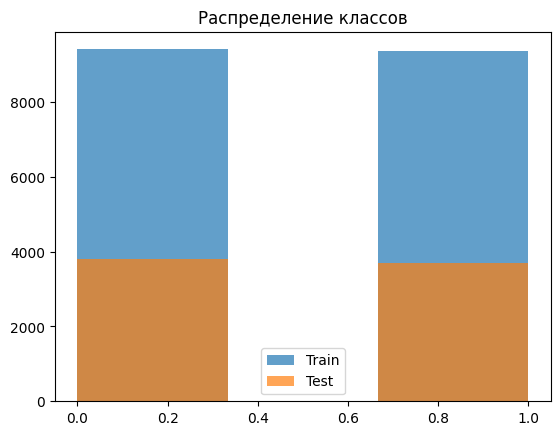

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
(ds_train, ds_test) = tfds.load('imdb_reviews', split=['train[:75%]', 'test[:30%]'], as_supervised=True)
train_data=list(tfds.as_numpy(ds_train))
test_data=list(tfds.as_numpy(ds_test))

x_train=np.array([example[0].decode('utf-8') for example in train_data])
y_train=np.array([example[1] for example in train_data])
x_test=np.array([example[0].decode('utf-8') for example in test_data])
y_test=np.array([example[1] for example in test_data])

print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [24]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
vectorizer = keras.layers.TextVectorization(max_tokens=10000, output_sequence_length=200)

# 4. Адаптируйте векторзатор на тренировочных текстах
vectorizer.adapt(x_train)

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (18750, 200)


## БЛОК 3: Построение модели

In [25]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)

model = keras.Sequential([
    keras.layers.Embedding(10000, 128, input_length=200),
    keras.layers.Conv1D(64, 5, activation='relu'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.build(input_shape=(None, 200))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - Precision: 0.6731 - Recall: 0.5428 - accuracy: 0.6671 - loss: 0.5920 - val_Precision: 0.8549 - val_Recall: 0.8378 - val_accuracy: 0.8493 - val_loss: 0.3510
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - Precision: 0.9092 - Recall: 0.9213 - accuracy: 0.9156 - loss: 0.2273 - val_Precision: 0.8387 - val_Recall: 0.8939 - val_accuracy: 0.8624 - val_loss: 0.3283
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - Precision: 0.9867 - Recall: 0.9878 - accuracy: 0.9871 - loss: 0.0587 - val_Precision: 0.8808 - val_Recall: 0.8238 - val_accuracy: 0.8576 - val_loss: 0.3953
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - Precision: 0.9995 - Recall: 1.0000 - accuracy: 0.9997 - loss: 0.0078 - val_Precision: 0.8596 - val_Recall: 0.8642 - val_accuracy: 0.8629 - val_loss: 0.4354
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - Precision: 0.9998 - Recall: 1.0000 - accuracy: 0.9999 - loss: 0.0020 - val_Precision: 0.8548 - val_Re

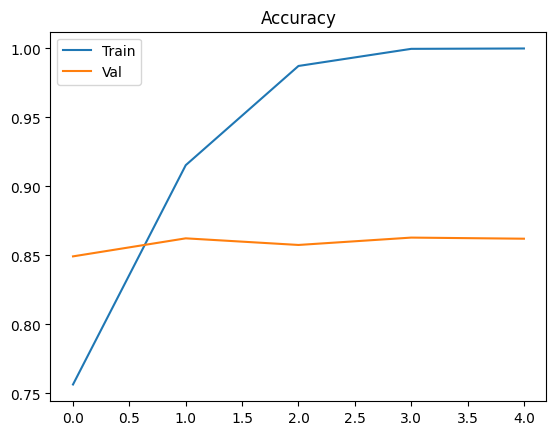

In [26]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32

history = model.fit(x_train_vec, y_train,
                    epochs=5,
                    validation_split=0.2,
                    batch_size=32)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

## БЛОК 5: Оценка

In [29]:
# 10. Оцените модель на тестовых данных

test_loss, test_acc, test_prec, test_rec = model.evaluate(x_test_vec, y_test, verbose=0)

print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"

    pred_prob = model.predict(x_test_vec)
    pred_label = "POS" if pred_prob.all() > 0.5 else "NEG"
    print(f"{text[:150]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")

Тестовая accuracy: 0.8568
Тестовая precision: 0.8591
Тестовая recall: 0.8479
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add... | True: POS | Pred: POS (0.99)
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
A blackly comic tale of a down-trodden priest, Nazarin showcases the economy that Luis Bunuel was able to achieve in being able to tell a deeply human... | True: POS | Pred: POS (0.99)
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
Scary Movie 1-4, Epic Movie, Date Movie, Meet the Spartans, Not another Teen Movie and Another Gay Movie. Making "Superhero Movie" the eleventh in a s... | True: NEG | Pred: POS (0.99)
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Poor Shirley MacLaine tries hard to lend some gravitas to this mawkish, gag-inducing "feel-good" movie, but she's trampled by the run-away sentimental... | True: NEG | Pred: POS (0.99)
235/235 ━━━━━━━

## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1.  Итоговая accuracy 0.9999 :(
2.  Разница на обучении и валидации показывает очень заметное переобучение. Accuracy всё время растёт и в какой-то момент достигает значения близкого к 1, график валидации за все пять эпох находиться примерно в одном диапазоне не растёт, но и не понижается. Такое соотвествие говорит о том, что модель выучила тренировочные данные, а не усвоила общие паттерны, и поэтому на случайном распределении (при валидации) не справляется. Итоговый показатель accuracy тоже служит индикатором переобучения.
3. По моему мнению, третий комментарий неверно классифицирован. Мне так кажется из-за строчки "Not another Teen Movie and Another Gay Movie", которая имплицирует на то, что это не плохой фильм, как те перечисленные. Возможно моделью этот комментарий был классифицирован как негативный из-за начала, а именно "Scary Movie 1-4". В котором "scary" имеет негативную коннотацию, а 1-4 могло быть воспринято как оценка: 1.4 из 5.